#Getting Started with Julia

***

From the Julia documentation on [julialang.org](http://julialang.org/): 

>Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments. It provides a sophisticated compiler, distributed parallel execution, numerical accuracy, and an extensive mathematical function library. Julia’s Base library, largely written in Julia itself, also integrates mature, best-of-breed open source C and Fortran libraries for linear algebra, random number generation, signal processing, and string processing. In addition, the Julia developer community is contributing a number of external packages through Julia’s built-in package manager at a rapid pace. IJulia, a collaboration between the IPython and Julia communities, provides a powerful browser-based graphical notebook interface to Julia.

## How to Use Julia

There are several options for interacting with Julia.  There is a [command-line REPL](http://julialang.org/downloads/) similar to iPython and the Matlab command-line interface.  There is the [Juno](http://junolab.org/) IDE which provides a development environment somewhere inbetween that of the Matlab IDE and Mathematica.  Finally, there is the Jupyter/iJulia Notebook interface, which I will primarily be using for this course. 

The easiest way to get started with Julia in the notebook environment is through [juliabox.org](https://www.juliabox.org).  JuliaBox allows you to get up and running with iJulia notebooks without having to install Julia on your local machine.  You can log into JuliaBox using your CU-Gmail account, and can sync files through your local machine, Google Drive, and even Github. 

## Some Simple Examples

The following statements produce matrices A and B:


In [1]:
A = [1 2; 3 5];
B = [4 5; 6 7];

The matrices defined by these statements are 

$~$

$$
A = 
\left[
\begin{array}{ll}
1 & 2 \\
3 & 5
\end{array}
\right]
\hspace{5mm} \textrm{and} \hspace{5mm}
B = 
\left[
\begin{array}{ll}
4 & 5 \\
6 & 7
\end{array}
\right]
$$

$~$

The semi-colon at the end of each statement suppresses any julia output to the screen, but is generally unnecessary.  In fact, a lot of times we want to see the output after we run a command. If we run the statement defining A again without the semi-colon we get some useful information: 

In [2]:
A = [1 2; 3 5]

2x2 Array{Int64,2}:
 1  2
 3  5

The output displays the matrix we just defined, as well as the row and column dimensions of the matrix, and the datatype of the variable A.  Note that because we entered the entries of A as integers the resulting variable is an Array of type Int64.  The 2 tells us that it's a two-dimensional array (i.e. a matrix).  

If we instead wanted a matrix with floating point entries we enter the entries as decimal numbers: 

In [3]:
C = [7.0 8.0; 9.0 10.0]

2x2 Array{Float64,2}:
 7.0   8.0
 9.0  10.0

We can now create new matrices by using A and B in expressions:

In [4]:
D = A + B;
E = A * B;

These statements define the new matrices D and E given by  

$~$

$$
D = 
\left[
\begin{array}{rr}
5 & 7 \\ 
9 & 12 
\end{array}
\right]
\hspace{5mm} \textrm{and} \hspace{5mm}
E = 
\left[
\begin{array}{rr}
16 & 19 \\ 
42 & 50 
\end{array}
\right]
$$

$~$

We can check the value of a variable at anytime just by typing the variable name into a code cell and evaluating.

In [21]:
D

2x2 Array{Int64,2}:
 5   7
 9  12

In [22]:
E

2x2 Array{Int64,2}:
 16  19
 42  50

Unlike some languages, the Julia multiplication operator $*$ performs correct matrix multiplication when used with two matrix operands.  Note that this is *not* elementwise multiplication.  If you need elementwise multiplication (only rarely useful in linear algebra) you can acheive this by putting a . in front of the multiplication operator. 

In [23]:
F = A .* B 

2x2 Array{Int64,2}:
  4  10
 18  35

Vectors can be created in a natural way by thinking of them as matrices with only a single row or single column.  The following commands produce a row vector u and a column vector v:

In [31]:
u = [1 2 3 4]

1x4 Array{Int64,2}:
 1  2  3  4

In [32]:
v = [1; 2; 3; 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

Note that in the column vector case, Julia is smart enough to recognize that this is a vector and stores it as a one-dimensional array.

Matrix transposes are formed using an apostrophe.  

In [29]:
G = A'

2x2 Array{Int64,2}:
 1  3
 2  5

The above statement defines the matrix G to be the transpose of A, i.e. 

$~$

$$
G = A^T = 
\left[
\begin{array}{rr}
1 & 3 \\ 
2 & 5 
\end{array}
\right]
$$

$~$



In [30]:
H = A * A'

2x2 Array{Int64,2}:
  5  13
 13  34

This statement sets the matrix H to the product of A and its transpose, i.e. 

$~$

$$
H = A~A^T = 
\left[
\begin{array}{rr}
5 & 13 \\ 
13 & 34 
\end{array}
\right]
$$

$~$

The following statements define a column vector $b = \left[ 1, \hspace{3mm}-1\right]^T$ and sets $x$ to be the solution of the system $Ax = b$, that is 

$~$

$$
x = 
\left[
\begin{array}{r}
-7 \\
4 
\end{array}
\right]
$$

$~$

In [5]:
b = [1; -1]
x = A \ b

2-element Array{Float64,1}:
 -7.0
  4.0

Note that the *backslash* command is a catch-all for solving linear system of equations.  The method that Julia uses to solve the system depend largely on the specific circumstances.  For dense square matrices it solves the system via LU-Decomposition.  For rectangular systems it finds the least-squares solution.  

A large portion of this course could be titled **What the Heck Does Backslash Do?**


<br>

##Array Indexing

Sometimes we want to inspect or work with portions of a vector or matrix instead of the whole thing. Consider the following vector $x$

In [22]:
x = [6; 2; 8; 3; 1];

This is a column vector with length 5.  We know that it has length 5 because we built it that way, but if we ever forget how long a vector is we can always check using the `length` function:

In [23]:
length(x)

5

If we want to access a specific entry in the vector $x$ we enclose the index of the desired entry in brackets.  For instance, if we want to know what's in the 3rd entry of $x$ we do the following

In [24]:
x[3]

8

This is the first significant deviation from Matlab syntax.  In Matlab you access array elements with parentheses instead of brackets.

Note that if we accidentally ask for an entry with index less than 1 or an index larger than the length of the array we get an error, as we should, since those entries do not exist:

In [25]:
x[6]

LoadError: BoundsError()
while loading In[25], in expression starting on line 1

In [26]:
x[0]

LoadError: BoundsError()
while loading In[26], in expression starting on line 1

If we want to know the last entry in the array we can access it using the length of the array as the index: 

In [27]:
x[length(x)]

1

This is a bit clunky for something that we might want to do often, so Julia provides a shortcut using the **end** index:

In [28]:
x[end]

1

We can also access a range of array entries using the colon operator.  Suppose we want to access entries 2 through 4 of the vector $x$: 

In [29]:
x[2:4]

3-element Array{Int64,1}:
 2
 8
 3

Note from the output that this returns another array of the same type as x, but of length 3 instead of 5. Similarly we could get the first two entries of x as 

In [30]:
x[1:2]

2-element Array{Int64,1}:
 6
 2

or the last two entries of x as 

In [31]:
x[end-1:end]

2-element Array{Int64,1}:
 3
 1

You can even get all of the entries of $x$ with odd indices:

In [32]:
x[1:2:end]

3-element Array{Int64,1}:
 6
 8
 1

This syntax for the index range says *starting with the first entry*, *step by 2*, and *stop at the last entry*.

<br>

Indexing into a matrix works similiarly.  Consider the following matrix

In [1]:
A = [1 2 3; 4 5 6; 7 8 9; 10 11 12]

4x3 Array{Int64,2}:
  1   2   3
  4   5   6
  7   8   9
 10  11  12

To get a specific entry in a matrix we have to provide a row index and a column index.  Just like in standard linear algebra notation the row index is given first, followed by the column index.  The following statements gets the entry of A in the second row and third column: 

In [3]:
A[2, 3]

6

We can also grab particular rows or columns of a matrix.  The following commands get the second column and third row of A, respectively:  

In [4]:
A[:, 2]

4-element Array{Int64,1}:
  2
  5
  8
 11

In [5]:
A[3, :]

1x3 Array{Int64,2}:
 7  8  9

Note that here the colon tells the computer to grab everything along that particular dimension.  Note that we could have also gotten the third row of A by specifying an index range from the start of the row to the end of the row: 

In [6]:
A[3, 1:end]

1x3 Array{Int64,2}:
 7  8  9

but again, we do things like this so frequently that Julia lets us use the plain colon as a shortcut. 

<br>

We can also grab submatrices of A by providing ranges for the row index and the column index.  Suppose we want to get the submatrix defined by the first three rows and the first two columns of A: 

In [7]:
A[1:3, 1:2]

3x2 Array{Int64,2}:
 1  2
 4  5
 7  8

Similarly, if we wanted the submatrix corresponding to last two rows and the last two columns of A we could use 

In [8]:
A[end-1:end, end-1:end]

2x2 Array{Int64,2}:
  8   9
 11  12

##Common Vectors and Matrices

There are some vectors and matrices that show up so often in linear algebra Julia gives us special functions to generate them.  

One of the most common vectors we might use is the zero vector.  This is produced by Julia's `zeros` function.  It takes as its only argument the length of the vector.  The following statement produces a zero vector of length 7:

In [11]:
z = zeros(7)

7-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Similarly, we can create a zero matrix by passing the function a row dimension and column dimension:

In [13]:
Z = zeros(3,4)

3x4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

Another common vector is the vector of all ones.  You can get this from Julia's `ones` function: 

In [15]:
n = ones(5)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [16]:
N = ones(3,2)

3x2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0
 1.0  1.0

Notice that by default, the `ones` function returns a matrix with entries of type Float64.  This is normally OK, but sometimes we might want an integer type matrix.  I wonder if Julia can do that? 

Now's probably a good time to introduce the most useful function in Julia, the `help` function.  By passing a function name to the `help` function we can get useful information about the function and its arguments.  Let's try it with the `ones` function: 

In [19]:
help(ones)

Base.ones(type, dims)

   Create an array of all ones of specified type. The type defaults to
   Float64 if not specified.

Base.ones(A)

   Create an array of all ones with the same element type and shape as
   A.


The first entry in the documentation for the **ones()** function tell us that it takes an optional argument for type.  Let's see what happens when we pass in Int64 as the type: 

In [20]:
ones(Int64, 3, 2)

3x2 Array{Int64,2}:
 1  1
 1  1
 1  1

Notice that this produced a 3 x 2 matrix of all ones with integer type. 

Probably the most common matrix of all is the **identity** matrix, i.e. a square matrix that has 1's on the main diagonal and zeros everywhere else.  

<br>

$$
I = 
\left[
\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{array}
\right]
$$

<br>

The Julia function that generates identity matrices is called `eye`.  If we give the `eye` function a single integer argument n it returns an identity matrix of size n x n. 

In [17]:
I = eye(3)

3x3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

##Functions and Scripts

Function definitions in Julia are very similar to Matlab, but with a few key differences.  Let's look at a few simple examples.  

Suppose we want a function that takes two input arguments, determines which argument is larger, and then evaluates a particular cubic polynomial with the larger argument.  In Julia this function would look as follows: 

In [2]:
# This is a sample Julia function that 
# evaluates a cubic polynomial at the larger
# of the two arguments x1 and x2 

function mycubic(x1, x2)
    x = max(x1, x2)
    y = x^3 + 2*x^2 + 1 
    return y 
end

mycubic (generic function with 1 method)

In [3]:
z1 = 1
z2 = 2 
z = mycubic(z1, z2)

17

Note that unlike Matlab, Julia requires an explict return statement for the quantity you want to return (more on this in a minute).

What if we want multiple values returned? 

Consider the following function that takes an angle theta (in radians) and returns both the cosine and sine of the angle:

In [4]:
# This is a sample Julia function that takes
# an angle theta and returns it's sine and cosine 

function trigfunction(theta)
    sintheta = sin(theta)
    costheta = cos(theta)
    return costheta, sintheta
end

trigfunction (generic function with 1 method)

In [11]:
c, s = trigfunction(0);

In [8]:
c

1.0

In [9]:
s

0.0

Sometimes we want to write more involved functions and store them in a text files instead of typing them into the notebook or into the REPL.  In Matlab these are stored in m-files with names like myfunction.m.  In Julia we store them in scripts with the .jl extension.  I've placed in this directory a file called `morefun.jl` which looks as follows: 

```julia
# This function evaluates a 
# quartic polynomial at the larger
# of two arguments x1 and x2

function myquartic(x1, x2)
    x = max(x1, x2)
    return x^4 + x^3 + 2*x^2 + 1
end 

# This function takes the x and y
# coordinates of a point and returns
# the angle that a line drawn from
# the origin to (x,y) makes with 
# the x-axis

function invtrigfunction(x, y)
    theta = atan(y/x)
    return theta
end
```

In this script I've written two new functions.  The first evaluates a quartic function at the larger of two arguments.  The second takes the x and y components of a point and returns the angle that a line from the origin to the point makes with the x-axis.  

To make these functions accessible to Julia we have to tell it somehow to look in the file `morefun.jl` for the functions.  We do this using the `require` function. 

In [14]:
require("morefun.jl")

Once the require function has been called, we're free to call any functions defined in the script file.  

In [13]:
z = myquartic(z1, z2)

33

In [15]:
theta = invtrigfunction(sqrt(2), sqrt(2))

0.7853981633974483

##Julia and Pass-By-Reference

OK, above I mentioned that Julia requires an explicit return statement for the value returned by the function.  I mentioned this because unlike Matlab, it is somewhat common in Julia to write functions with the intended purpose of modifying one or more of the input arguments.  If this is the intended purpose of the function then a return statement is not necessary. 

Consider the following example that takes a vector argument, and swaps the first and the last elements of the vector.

In [25]:
function swapMe!(x)
    temp = x[1]
    x[1] = x[end]
    x[end] = temp
end

swapMe! (generic function with 2 methods)

In [26]:
v = [1, 2, 3, 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [27]:
swapMe!(v);

In [28]:
v

4-element Array{Int64,1}:
 4
 2
 3
 1

Notice that the function `swapMe!` did not return anything, but actually modified the input argument v. This is possible in Julia because arguments are passed by **reference**.  In other words, when we pass an array (or matrix) into a function, it does not automatically make a local copy of the argument that will live and die inside of the function call.  This is extremely handy in computational linear algebra because sometimes we want to pass a large matrix into a function and change some of the values.  Not making an extra copy often saves us loads of extra time and memory. 

Another note: I did not add the exclamation point at the end of `swapMe!` because I get super excited about swapping the ends of vectors.  It's convention in Julia to add an exclamation point at the end of any function name that changes one of its input arguments, whether it is the intended purpose of the function, or just a side-effect. 

Julia also uses pass-by-reference in assignment.  Consider creating a matrix A and then defining a matrix B by setting it equal to A.  

In [30]:
A = [1 2; 3 4]
B = A;

In [31]:
A

2x2 Array{Int64,2}:
 1  2
 3  4

In [32]:
B

2x2 Array{Int64,2}:
 1  2
 3  4

Since assignment in Julia is pass-by-reference, matrices A and B are really the same, in the sense that both names `A` and `B` point to the same place in memory.  This means that if I modify `B` it will also modify `A`.

In [34]:
B[1,1] = 7;

In [35]:
B

2x2 Array{Int64,2}:
 7  2
 3  4

In [36]:
A

2x2 Array{Int64,2}:
 7  2
 3  4

This actually has it's ups and downs.  Lots of times we like to initialize the value of a new array to the value of an existing array, with the intent of then modifying the new array.  This can be dangerous if we want the old array to remain the same. To define an array to be a bonifide **copy** of an existing array we use the `copy` function. 

In [38]:
C = copy(A)

2x2 Array{Int64,2}:
 7  2
 3  4

In [40]:
C[1,1] = 10;

In [41]:
C

2x2 Array{Int64,2}:
 10  2
  3  4

In [42]:
A

2x2 Array{Int64,2}:
 7  2
 3  4

Note that this time the value of A did not change, because C is legitmate copy of A and an entirely different matrix. 

##Control Statements

Julia contains the usual `for`, `while`, and `if` statements.  The syntax for each of these is identical to their Matlab counterparts. 

###for statement

Suppose we want to use a for-loop to sum up the entries of a vector: 

In [2]:
x = [1, 2, 3, 4, 5]
sx = 0
for ii = 1 : length(x)
    sx = sx + x[ii]
end 

In [3]:
sx

15

For-loops can of course be nested as well, useful if you want to sum up all of the entries in a matrix. 

In [52]:
A = [1 2 3; 4 5 6; 7 8 9]
sA = 0 
for ii = 1 : size(A, 1)
    for jj = 1 : size(A, 2)
        sA = sA + A[ii,jj]
    end
end

In [53]:
sA

45

###if and if-else statements

Suppose we have a matrix and we want to filter its entries by size.  In particular, we decide that any entry in the matrix that is less than 0.5 we deem unimportant and set it to zero.  We'll try this on a randomly generated matrix constructed using the `rand` function.

In [65]:
A = rand(5,5)

5x5 Array{Float64,2}:
 0.66186   0.200773  0.227937    0.383626   0.639254
 0.562456  0.489652  0.060766    0.0071924  0.06755 
 0.562822  0.364481  0.953539    0.978672   0.164182
 0.155888  0.904537  0.732105    0.337072   0.239219
 0.54641   0.113851  0.00442316  0.133148   0.388853

In [66]:
for ii = 1 : size(A, 1)
    for jj = 1 : size(A, 2)
        if A[ii, jj] < 0.5 
            A[ii, jj] = 0.0
        end
    end
end

In [67]:
A

5x5 Array{Float64,2}:
 0.66186   0.0       0.0       0.0       0.639254
 0.562456  0.0       0.0       0.0       0.0     
 0.562822  0.0       0.953539  0.978672  0.0     
 0.0       0.904537  0.732105  0.0       0.0     
 0.54641   0.0       0.0       0.0       0.0     

Now suppose we don't actually care what the values of the big elements of the matrix are, we just care that they're big.  Instead of leaving the big entries alone, we could set them to 1.  

In [68]:
B = rand(5,5)

5x5 Array{Float64,2}:
 0.577684   0.162156   0.899312  0.950674  0.0614532
 0.873093   0.399296   0.411434  0.027608  0.15344  
 0.316831   0.203387   0.883337  0.384259  0.0332478
 0.0221985  0.651835   0.314339  0.462638  0.610443 
 0.948303   0.0340436  0.311315  0.523442  0.0213111

In [69]:
for ii = 1 : size(B, 1)
    for jj = 1 : size(B, 2)
        if B[ii, jj] < 0.5 
            B[ii, jj] = 0.0
        else
            B[ii, jj] = 1.0
        end
    end
end

In [70]:
B

5x5 Array{Float64,2}:
 1.0  0.0  1.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0

###while statement

Suppose I want to know how many times I need to flip a coin before 50 (non-consecutive) heads appear.  We'll simulate flipping a coin by generating random integers between 0 and 1 using the `rand` function (the `rand` function is really a collection of a bunch of methods.  Type `help(rand)` to see everything it can do).  If we associate 1 with heads and 0 with tails, we'll simply keep flipping until 1 appears 50 times. 

In [63]:
numFlips = 0 
numHeads = 0 
while numHeads < 50 
    flip = rand(0:1)
    numFlips = numFlips + 1 
    if flip == 1 
        numHeads = numHeads + 1 
    end
end 

In [64]:
numFlips

102

##Loops and Timing 

One of the wonderfull things about Julia is that it does not suffer from the **slow-loop** problems that Matlab does.  In Matlab it's almost always better to use a canned routine when available instead of writing your own function that involves loops.  As an example, you might try generating a really long random vector in Matlab, and compare the time it takes to sum the entries with a loop versus the time it takes using the canned `sum` function. 

On my machine it took Matlab 0.0014 seconds to sum a random vector with 100K entries using the `sum` function, and 0.017 seconds to sum the same vector using loops.  

Let's see what happens when we compare Julia's `sum` command and equivalent loop implementation.  We'll time the computation using Julia's @time macro: 

In [72]:
x = rand(1000000);

In [75]:
@time sum(x)

elapsed time: 0.01853037 seconds (827132 bytes allocated)


500486.88124723965

Well crap, that's way slower than Matlab.  Actually, the slowness lies in Julia's JIT (just in time) compiler.  The first time you run a function during a session, Julia looks at the arguments that you've passed to it, finds the routine that matches the argument type, compiles it, and then runs it.  The compile overhead actually takes a bit of time.  But watch what happens when we run it agian.  

In [86]:
@time sum(x)

elapsed time: 0.000671371 seconds (96 bytes allocated)


500486.88124723965

OK, that's way better.  But what happens if we roll our own sum function with loops?

In [81]:
function mySum(z)
    s = 0.0
    for ii = 1 : length(z)
        s = s + z[ii]
    end
    return s
end

mySum (generic function with 1 method)

In [82]:
@time mySum(x)

elapsed time: 0.004972211 seconds (83308 bytes allocated)


500486.88124725834

OK, that was the slow one where Julia had to convert our little script into machine code.  Now let's run it again. 

In [88]:
@time mySum(x)

elapsed time: 0.001094706 seconds (96 bytes allocated)


500486.88124725834

OK, that's much better.  The looped version of our sum function is only about a third slower than the canned sum function, and actually faster than both of the Matlab implementions.  We could probably improve the performance even more by telling Julia exactly what types of arguments we plan to pass our function, but let's quit while we're ahead.

<br>

##Simple Plots

There are a few choices for plotting libraries in Julia.  The most common option is [PyPlot](https://github.com/stevengj/PyPlot.jl), which provides a Julia interface to python's matplotlib library.  Other options include the [Gadfly](https://github.com/dcjones/Gadfly.jl) and [Winston](https://github.com/nolta/Winston.jl) libraries.

To enable the PyPlot package execute the following statement: 

In [90]:
using PyPlot

The **using** command is the standard method for loading external packages available in Julia.  

The following statements generate a plot of the sine function on the interval $\left[0, 2\pi\right]$:

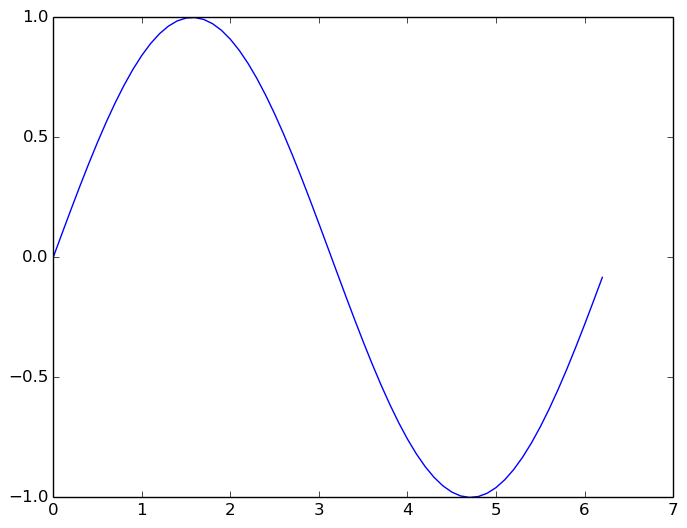

In [91]:
x = [0:0.1:2*pi]
y = sin(x)
plot(x, y);

The statement **x = [0:0.1:2*pi]** creates an array of equally spaced values starting at 0 and ending (roughly) at $2\pi$ with a stepsize of 0.1 between each entry.  You can check the type and length of the resulting vector x by typing x in a code cell and executing it.

In [20]:
x

63-element Array{Float64,1}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
 1.1
 1.2
 ⋮  
 5.1
 5.2
 5.3
 5.4
 5.5
 5.6
 5.7
 5.8
 5.9
 6.0
 6.1
 6.2

In [7]:
2*pi

6.283185307179586

Note that the last element of x is not quite $2\pi \approx 6.2832$, because $2\pi$ is not a multiple of the chosen step size, but it gets pretty close. 

This above example is the most basic plot using PyPlot.  We can do all kinds of things to make it look nicer.  

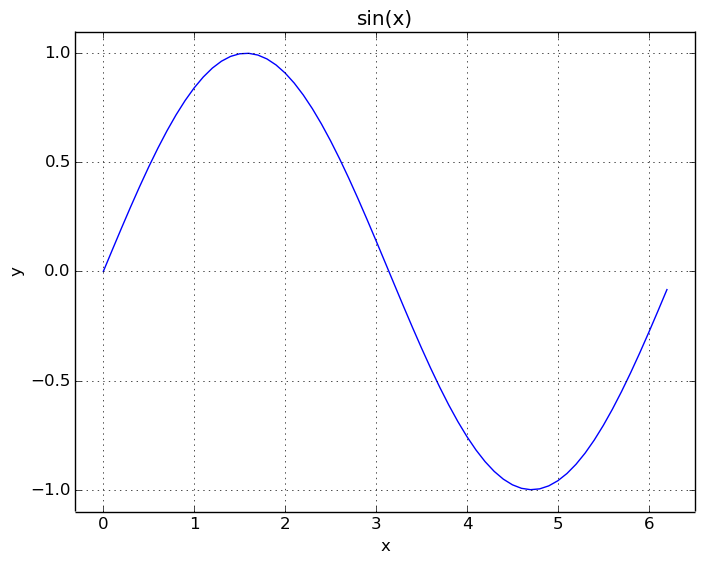

In [93]:
plot(x,  y)
xlabel("x")
ylabel("y")
title("sin(x)")
grid("on")
margins(0.05);

##Wrap Up

This has been a whirlwind tour of basic Julia functionality, but we really just scratched the surface.  Head over to the documentation page on [julialang.org](http://docs.julialang.org/en/release-0.3/) and check out the rest.  If you want to see a nice list of the major differences between Julia and other prototyping languages (including Matlab) you can do so [here](http://julia.readthedocs.org/en/latest/manual/noteworthy-differences/).

If you would like to interact directly with this notebook, or others that I post throughout the course, you can sync JuliaBox directly to the course github repository.  While logged into JuliaBox, click on the Sync tab and enter the following address into the box marked `Git Clone URL` : 

>`https://github.com/chrisketelsen/csci2820.git`

Finally, click the sync button (the spinning wheel icon) to sync the material. This will create a directory called `csci2820` in your main JuliaBox containing everything in the repository.  Feel free to play with and modify any of the available notebooks. As more things get added to the repo you can update your copy by returning to the Sync tab and re-syncing the repository.  